# Titanic Data Features
**Author:** Anjana Dhakal

**Date:** 10-28-2025

**Introduction:** Explore the Titanic dataset to analyze patterns, clean data, engineer features, and prepare for modeling survival.

## Section 1. Import and Inspect the Data
In the code cell below, import the necessary Python libraries for this notebook.  

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Inspect
titanic.info()
# Display the first 10 rows.
print(titanic.head(10))
# Check for missing values using the isnull() method and then the sum() method
print(titanic.isnull().sum())
# Display summary statistics using the describe() method
print(titanic.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0 

In [104]:
# Check for correlations using the corr() method and tell it to use only the numeric features.
print(titanic.corr(numeric_only=True))

            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000  


## Reflection 1:
1) How many data instances are there? 891
2) How many features are there? 15
3) What are the names? survived, pclass, age, sex, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone
4) Are there any missing values? Yes.(age, embarked, deck, embark_town)
5) Are there any non-numeric features? Yes. (sex, embarked, deck, who, adult_male, alone, etc.)
6) Are the data instances sorted on any of the attributes? Instances not sorted on any attribute
7) What are the units of age? years
8) What are the minimum, median and max age? Min/Median/Max age: 0, 28, 80
9) What two different features have the highest correlation? Here, sibsp and parch have 0.414, which is higher than correlations between other numeric features.

10) Are there any categorical features that might be useful for prediction?

## Section 2. Data Exploration and Preparation
2.1 Explore Data Patterns and Distributions

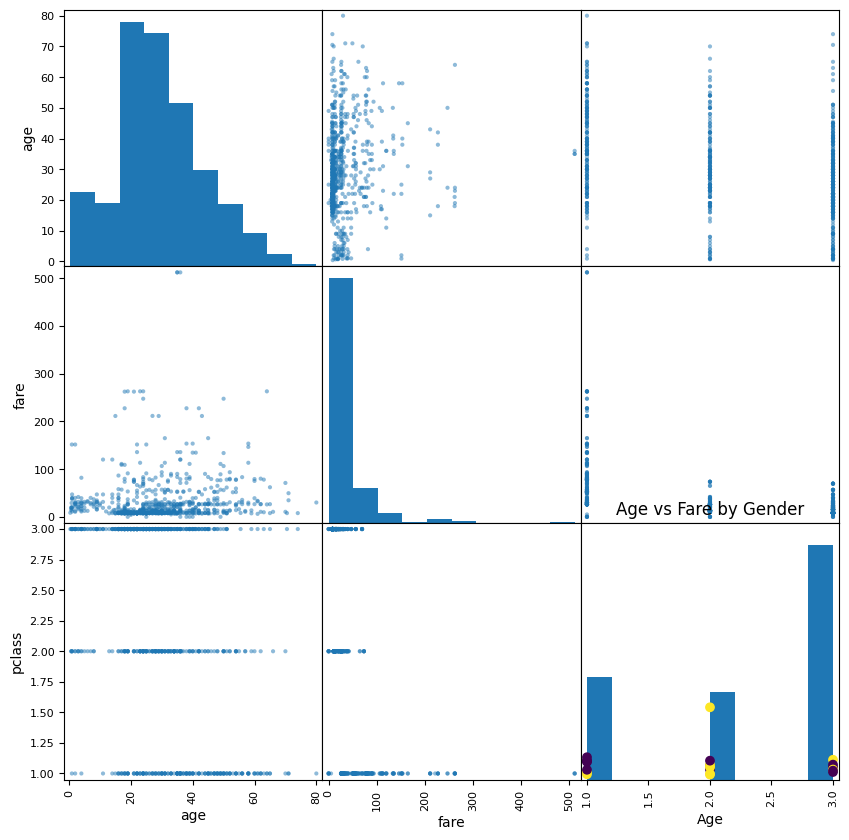

In [105]:
from pandas.plotting import scatter_matrix
attributes = ['age', 'fare', 'pclass']
scatter_matrix(titanic[attributes], figsize=(10,10))

# Scatter plot age vs fare by gender
plt.scatter(titanic['age'], titanic['fare'], 
            c=titanic['sex'].apply(lambda x: 0 if x=='male' else 1))
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender')
plt.show()



###
 Create a histogram of age:

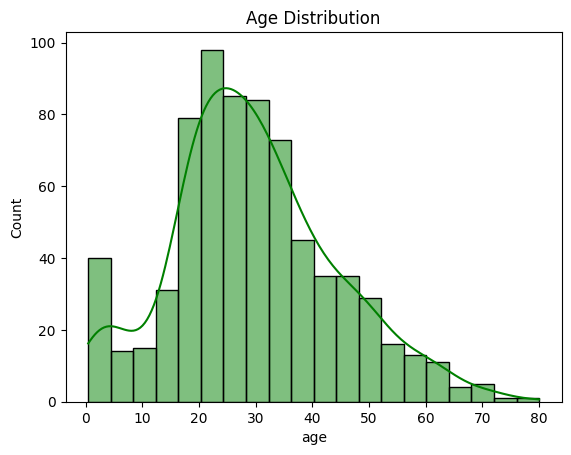

In [106]:
# Histogram of age
sns.histplot(titanic['age'], kde=True, color='green')
plt.title('Age Distribution')
plt.show()



###
 Create a count plot for class and survival:

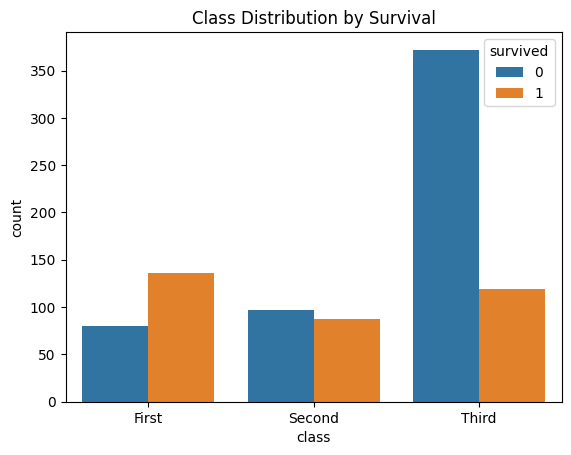

In [107]:
# Count plot for class and survival
sns.countplot(x='class', hue='survived', data=titanic)
plt.title('Class Distribution by Survival')
plt.show()

###
Reflection 2.1:

1. What patterns or anomalies do you notice? Passengers in higher classes (1st class) had a better chance of survival compared to 2nd or 3rd class passengers.
2. Do any features stand out as potential predictors? age(children had higher survival,), sex(gender strongly influences survival probability), class(higher-class passengers had better access to lifeboats), fare, family_size (could affect survival chances, as those traveling alone or in very large families may have different survival rates.)
3. Are there any visible class imbalances? The dataset has slightly more non-survivors than survivors, which may affect model training

## 
2.2 Handle Missing Values and Clean Data

In [108]:
# Impute missing values
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)


C:\Users\AnjanaD\AppData\Local\Temp\ipykernel_27440\1635075856.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
C:\Users\AnjanaD\AppData\Local\Temp\ipykernel_27440\1635075856.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

## 
2.3 Feature Engineering

In [109]:
# Create family size
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Convert categorical to numeric
titanic['sex'] = titanic['sex'].map({'male':0, 'female':1})
titanic['embarked'] = titanic['embarked'].map({'C':0,'Q':1,'S':2})

# Create binary 'alone' feature
titanic['alone'] = titanic['alone'].astype(int)


##
Reflection 2.3

1. Why might family size be a useful feature for predicting survival? Family size may affect survival probability
2. Why convert categorical data to numeric? Numeric encoding needed for ML algorithms

## Section 3. Feature Selection and Justification

In [110]:
# Features and target
X = titanic[['age', 'fare', 'pclass', 'sex', 'family_size']]
y = titanic['survived']


##
Reflection 3:

1. Why are these features selected? Features chosen for predictive power
2. Are there any features that are likely to be highly predictive of survival? Highly predictive: sex, age, class, family_size

## Section 4. Splitting Data
1. Basic Train/Test Split

In [111]:
from sklearn.model_selection import train_test_split

# Split X and y together
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

print('X_train size:', len(X_train))
print('X_test size:', len(X_test))
print('y_train size:', len(y_train))
print('y_test size:', len(y_test))


X_train size: 712
X_test size: 179
y_train size: 712
y_test size: 179


##
2. Stratified Train/Test Split
   

In [112]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx, test_idx in splitter.split(X, y):
    train_set = X.iloc[train_idx]
    test_set = X.iloc[test_idx]

print('Train size:', len(train_set))
print('Test size:', len(test_set))

# Compare class distributions
print("Original Class Distribution:\n", y.value_counts(normalize=True))
print("Train Set Class Distribution:\n", train_set['pclass'].value_counts(normalize=True))
print("Test Set Class Distribution:\n", test_set['pclass'].value_counts(normalize=True))


Train size: 712
Test size: 179
Original Class Distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Train Set Class Distribution:
 pclass
3    0.561798
1    0.227528
2    0.210674
Name: proportion, dtype: float64
Test Set Class Distribution:
 pclass
3    0.508380
1    0.301676
2    0.189944
Name: proportion, dtype: float64


##
Reflection 4:

1. Why might stratification improve model performance? 
   Stratification ensures that the training and test sets maintain the same proportion of classes as the original dataset. This prevents bias and ensures the model is trained and evaluated on representative data.
2. How close are the training and test distributions to the original dataset? 
   With stratified splitting, the class distributions in both training and test sets closely match the original dataset. Without stratification, the proportions can vary more, leading to potential imbalance.
3. Which split method produced better class balance? 
   The stratified split produced better class balance because it explicitly preserves the original class proportions, whereas the basic random split can produce uneven distributions, especially in smaller datasets.
 